In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("NBA_Dataset_csv.csv")

In [2]:
print("Duimension of the Dataset: ",data.shape)

Duimension of the Dataset:  (159, 7)


In [3]:
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [5]:
df=data.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga','Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI','Players_Absent_For_Sessions':'PAFS'})

In [6]:
df.Points

0      242
1      144
2      156
3      159
4      106
      ... 
154     12
155     13
156     12
157     20
158      0
Name: Points, Length: 159, dtype: int64

In [7]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


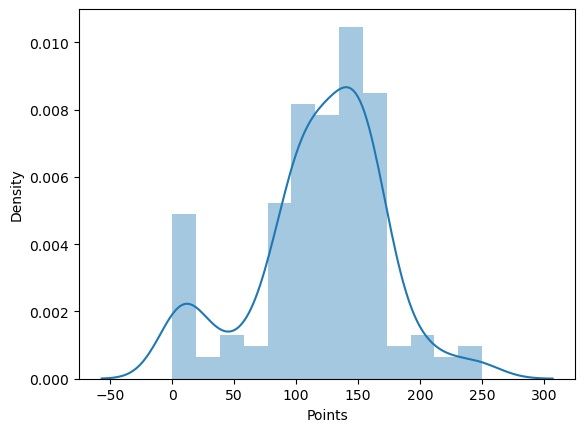

In [8]:
# Distplot

ax=sns.distplot(df.Points)

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


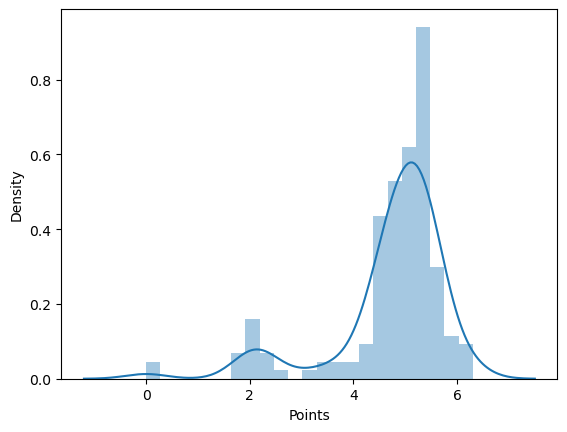

In [9]:
ax=sns.distplot(np.cbrt(df.Points))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Points'>

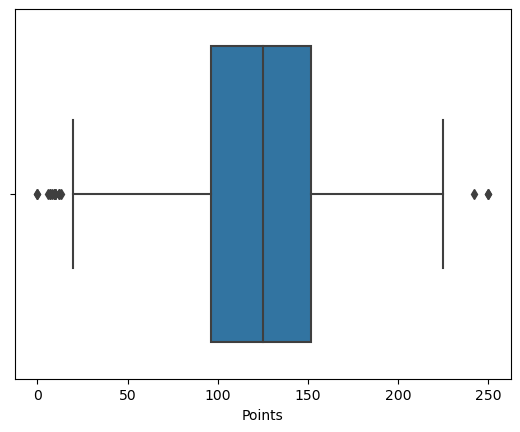

In [10]:
sns.boxplot(df.Points)

In [11]:
df.tail(100)

,Team,Points,WL,Yoga,Laps,WI,PAFS
59,Clippers,156,34.0,28.0,40.0,5.0,5.0
60,Clippers,122,37.0,29.0,44.0,5.0,2.0
61,Warriors,55,14.0,8.0,17.0,3.0,3.0
62,Warriors,60,14.0,8.0,17.0,3.0,4.0
63,Warriors,90,16.0,11.0,20.0,3.0,7.0
...,...,...,...,...,...,...,...
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0


In [12]:
def plotting_box_violin_plots(df,x,y):
  fig,axes=plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and boxplots for variable: {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable: {}".format(y))
  axes[1].set_title("Box plot for variable: {}".format(y))



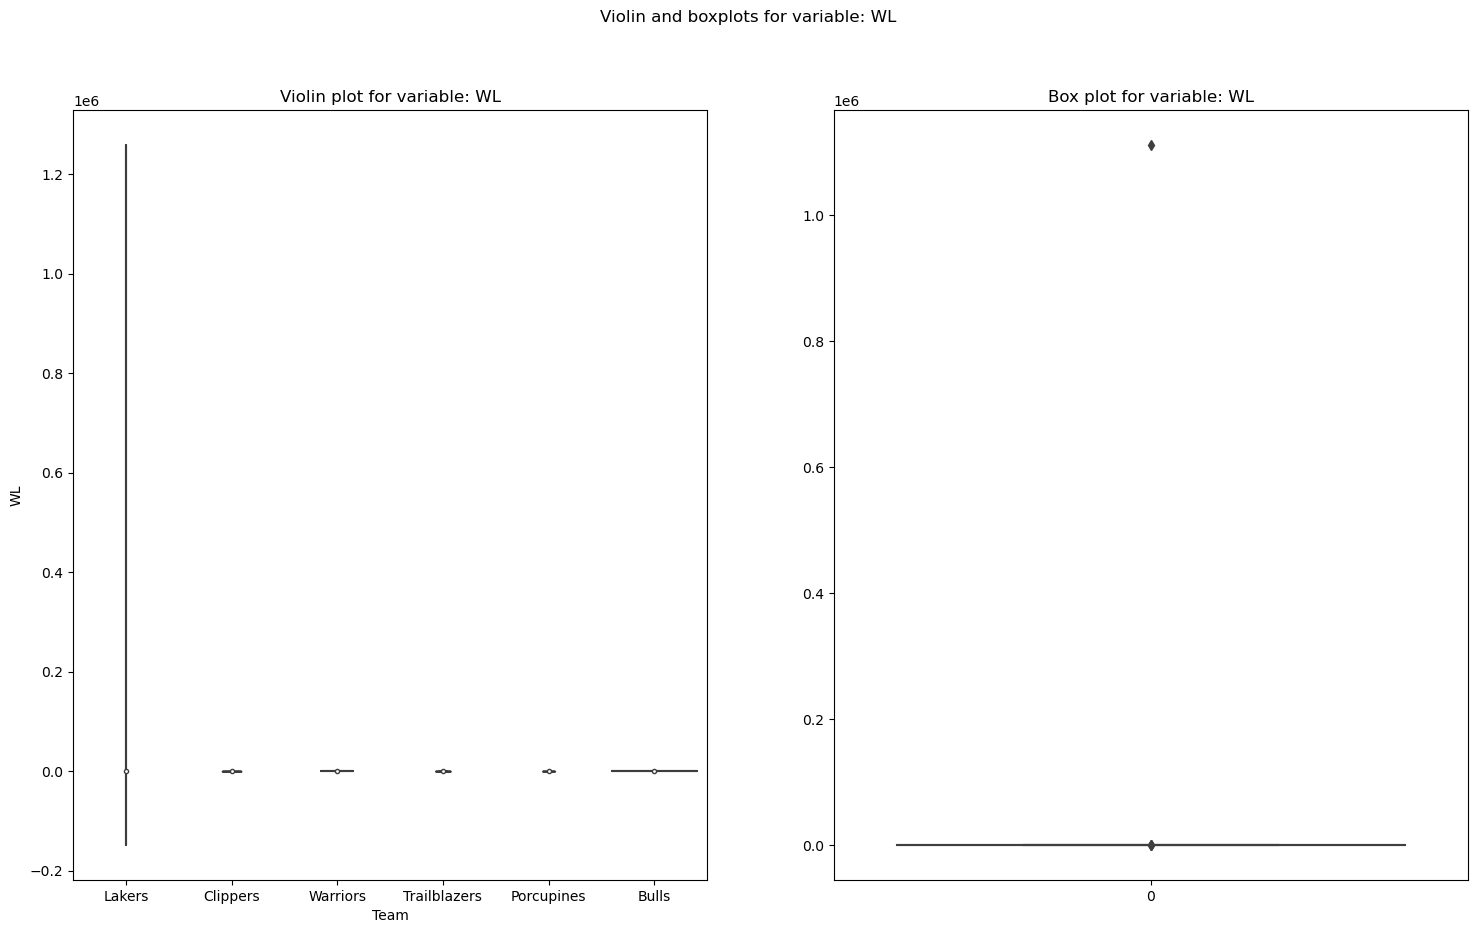

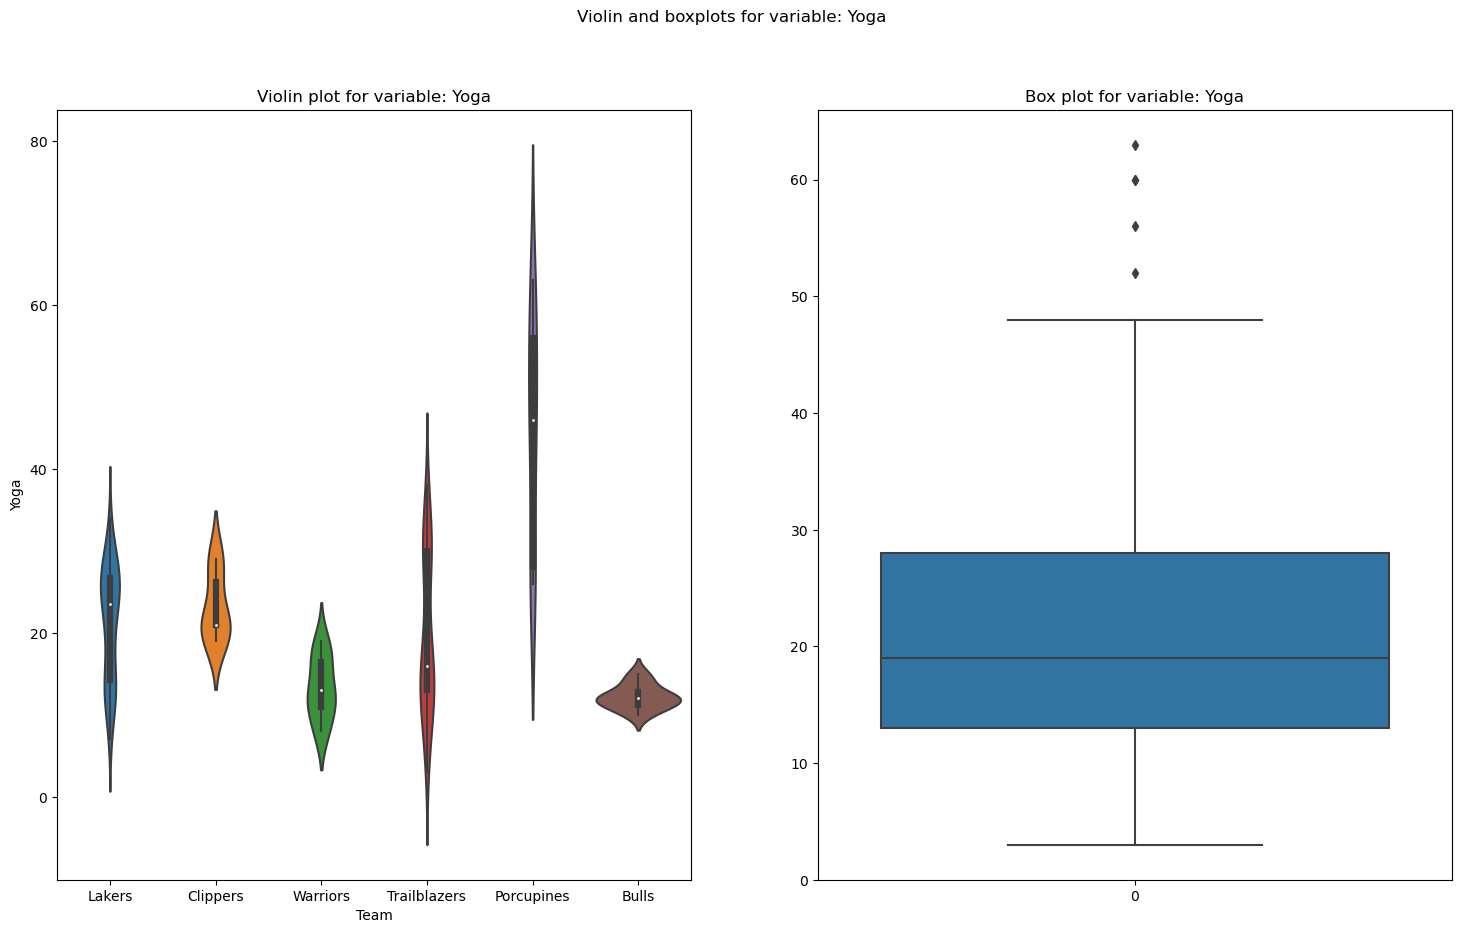

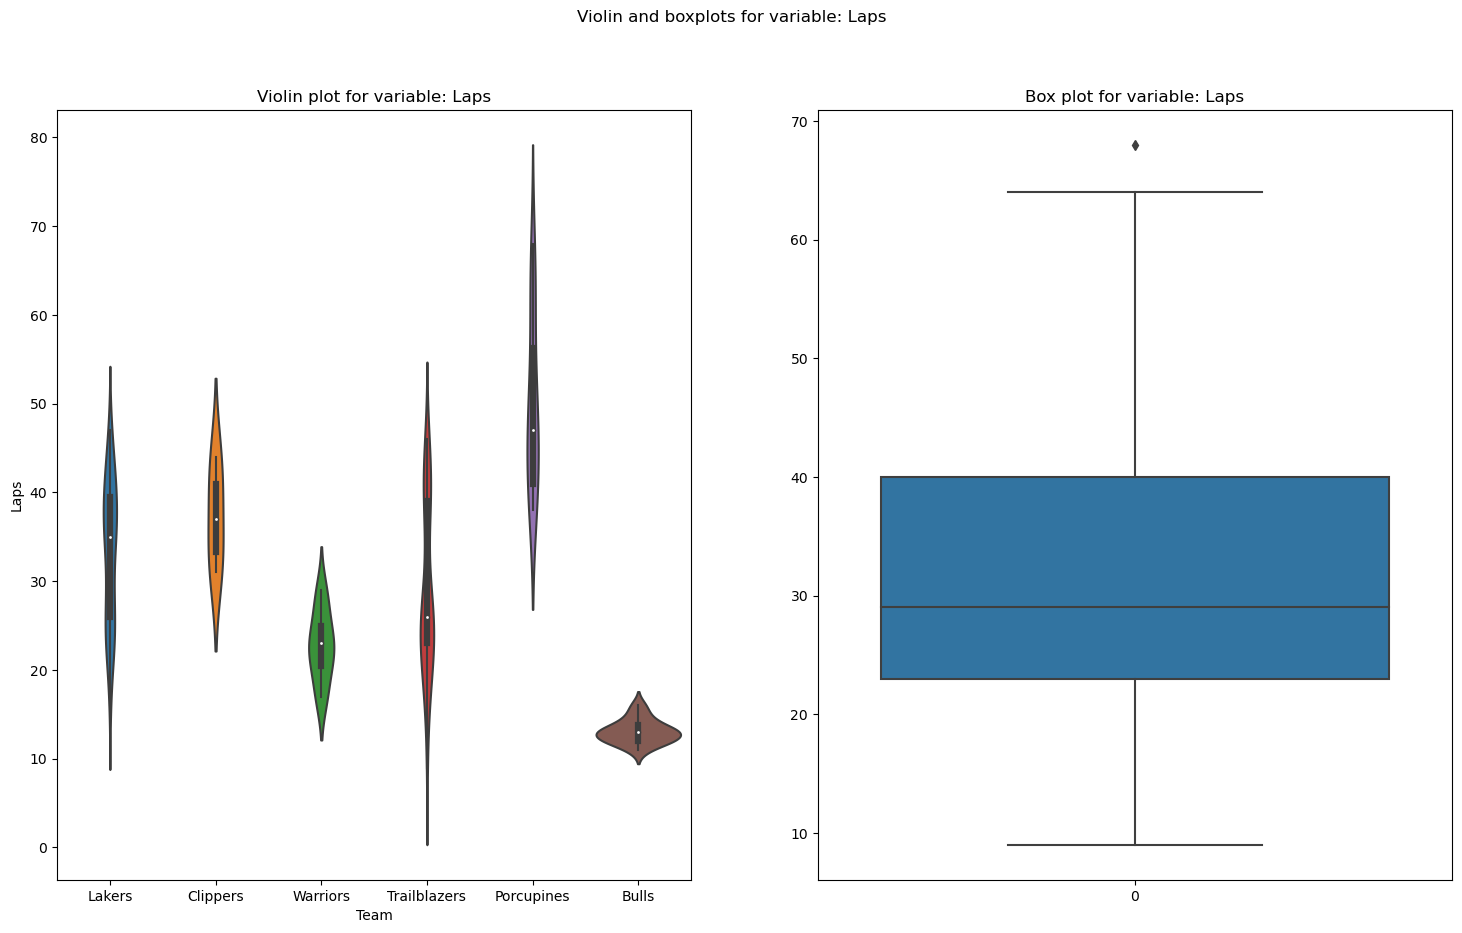

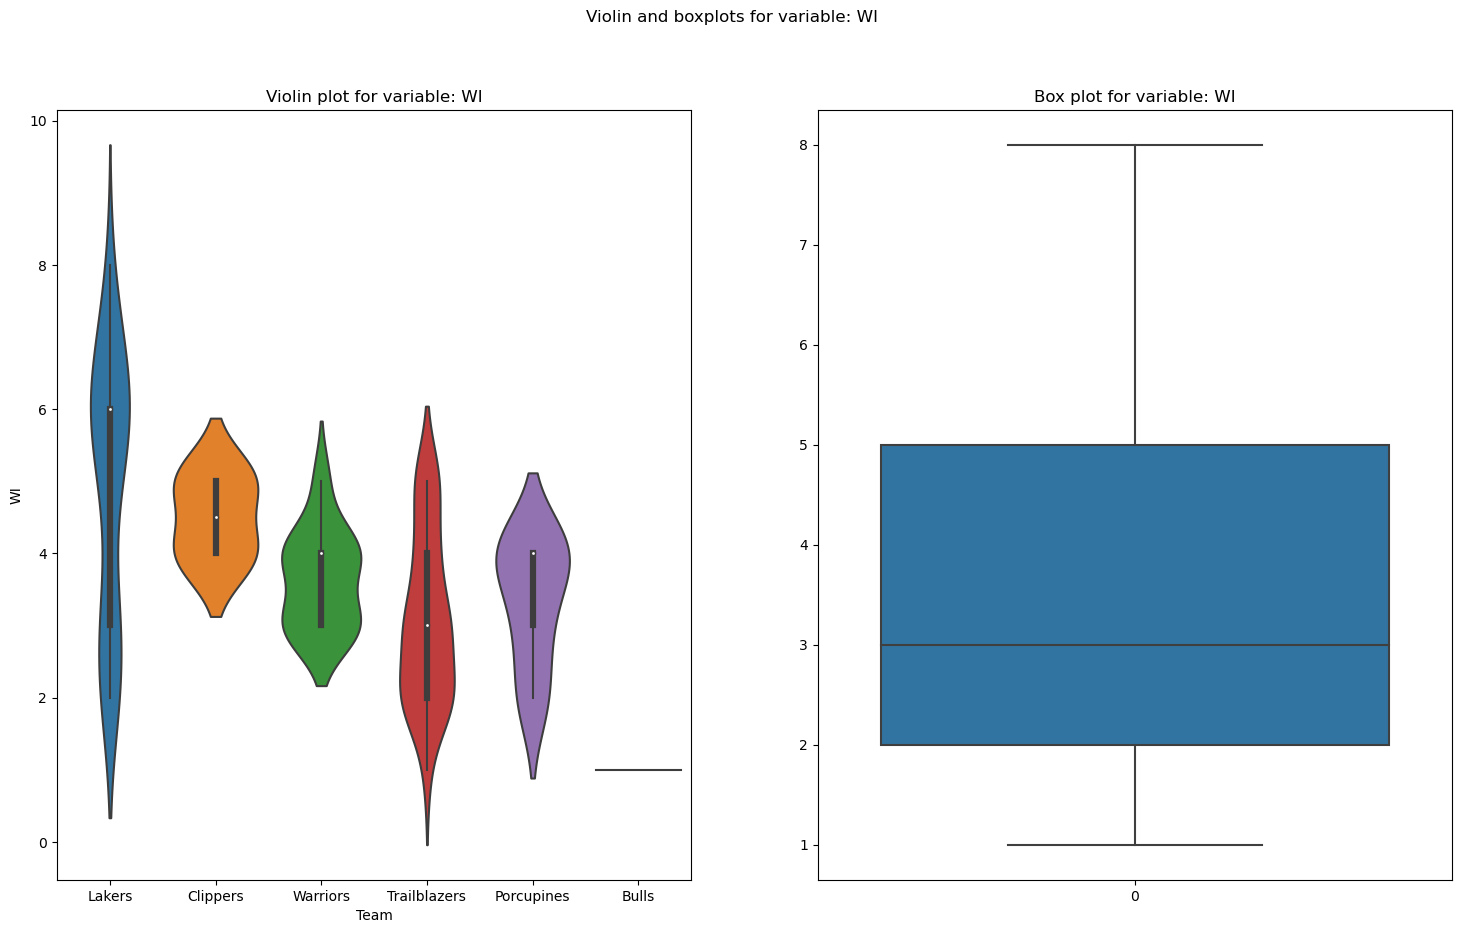

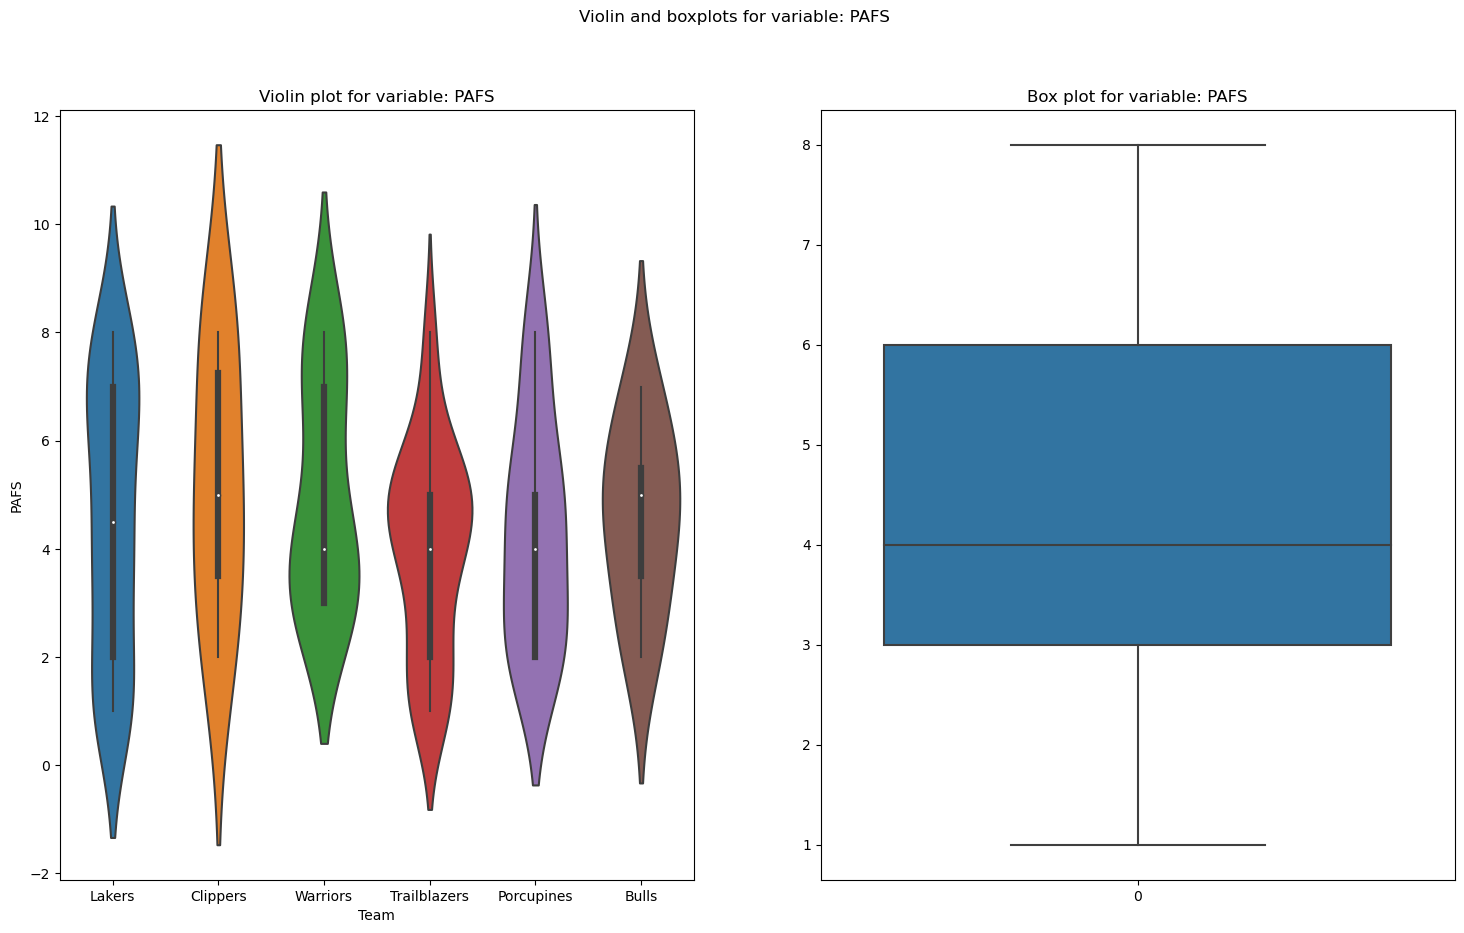

In [13]:
for x in ['WL',	'Yoga',	'Laps',	'WI',	'PAFS']:
  plotting_box_violin_plots(df,"Team",x)

In [14]:
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][ (df[column]>Upper_End) | (df[column]<Lower_End) ]

  return outlier

In [15]:
for column in ['WL',	'Yoga',	'Laps',	'WI',	'PAFS']:
  print("\n Outlier in column '%s' " %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outlier in column 'WL' 
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outlier in column 'Yoga' 
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outlier in column 'Laps' 
144    68.0
Name: Laps, dtype: float64

 Outlier in column 'WI' 
Series([], Name: WI, dtype: float64)

 Outlier in column 'PAFS' 
Series([], Name: PAFS, dtype: float64)


In [16]:
df_clean=df.drop([142,143,144])

In [17]:
df_clean.shape

(156, 7)

In [18]:
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

/tmp/ipykernel_741/2623503847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WL'][df_clean['WL']==1111111.0]=np.nan


In [19]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

## Imputation Techniques

In [20]:
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [21]:
ncounts=ncounts.rename(columns={1:'data_missing'})

In [22]:
ncounts

,0
Team,0.000000
Points,0.000000
WL,0.064103
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


<Axes: title={'center': '% of missing values across each column'}>

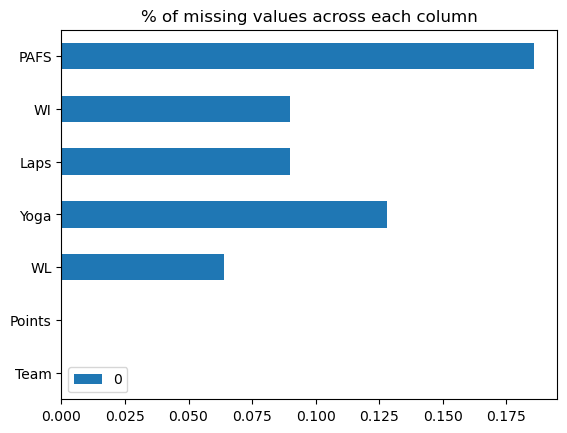

In [23]:
ncounts.plot(kind='barh',title='% of missing values across each column')

In [24]:
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [25]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

## Pandas Imputer

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   Points  156 non-null    int64  
 2   WL      146 non-null    float64
 3   Yoga    136 non-null    float64
 4   Laps    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [27]:
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for WL')

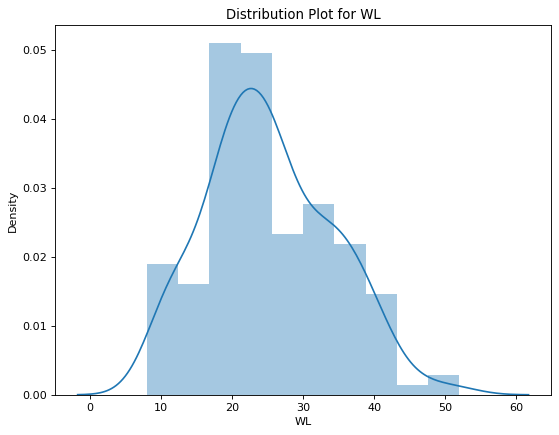

In [28]:
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

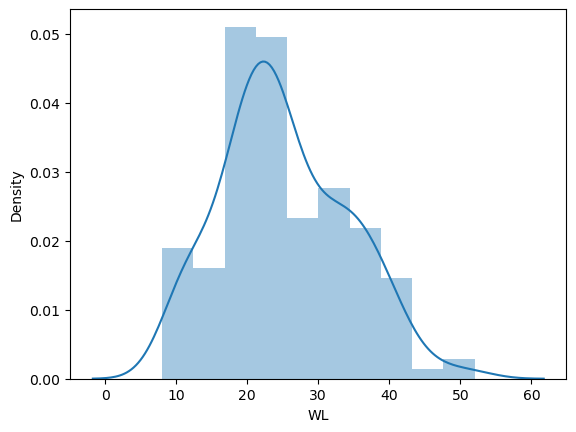

In [29]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))

In [30]:
# Groupby Team

mean_WL = df_clean.groupby("Team")['WL'].mean().to_dict()

In [31]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [32]:
WL_series = df_clean['WL'].replace(mean_WL)

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

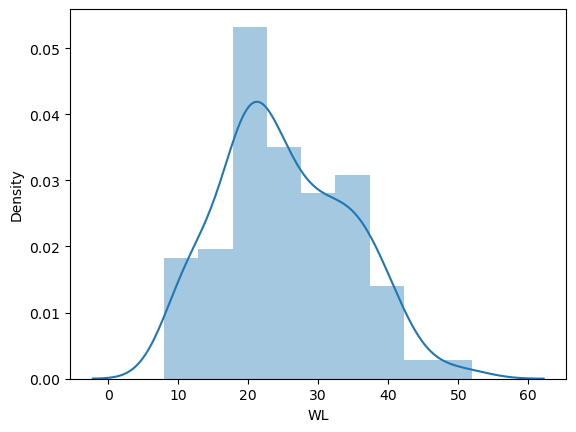

In [33]:
sns.distplot(df_clean['WL'].replace(mean_WL))

## SKlearn Imputer

In [34]:
# Simple Imputer

Features = ['WL',	'Yoga',	'Laps',	'WI',	'PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

# Fit & Transform

si_impt = impt.fit_transform(df_clean[Features])
si_impt_df = pd.DataFrame(si_impt,columns=Features)

si_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [35]:
# Iterative Impute

from sklearn.experimental import enable_iterative_imputer

In [36]:
from sklearn.impute import IterativeImputer

ITI = IterativeImputer(max_iter = 10)

# Fit & Transform

ITI_impt = ITI.fit_transform(df_clean[Features])

ITI_impt_df = pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.063002,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.413163
152,12.0,12.000000,14.0,1.0,4.413298
153,12.0,13.000000,14.0,1.0,4.413450
154,13.0,14.000000,15.0,1.0,6.000000


In [37]:
# KNN imputer

from sklearn.impute import KNNImputer

KNN = KNNImputer(n_neighbors = 3)

# Fit & Transform

KNN_impt = KNN.fit_transform(df_clean[Features])

KNN_impt_df = pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


In [38]:
# clone the repository
# !git clone https://github.com/analokmaus/kuma_utils.git

In [39]:
import sys
sys.path.append('kuma_utils/')

In [40]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [41]:
%%time
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])


df_itr_df=pd.DataFrame(df_itr,columns=Features)

  0%|          | 0/5 [00:00<?, ?it/s]

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument

CPU times: user 12.3 s, sys: 2.07 s, total: 14.4 s
Wall time: 5.2 s


/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument

In [42]:
df_itr_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.357742,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.805411
155,12.0,12.000000,14.0,1.0,3.805411
156,12.0,13.000000,14.0,1.0,3.953409
157,13.0,14.000000,15.0,1.0,6.000000


In [43]:
df_new = df_itr_df

## Univariate Analysis

In [44]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

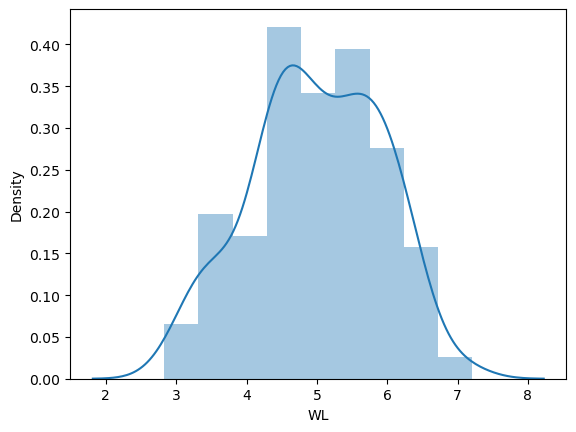

In [45]:
sns.distplot(np.sqrt(df_new['WL']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='WL'>

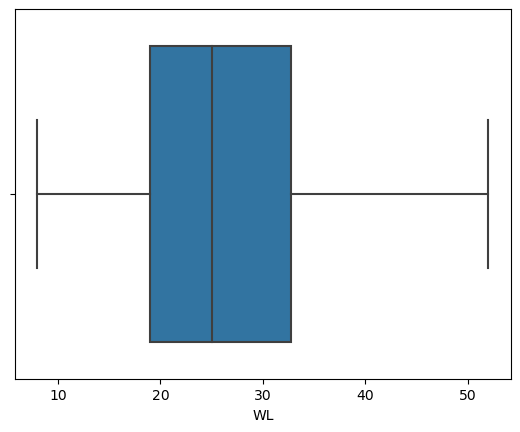

In [46]:
sns.boxplot(df_new['WL'])

<Axes: >

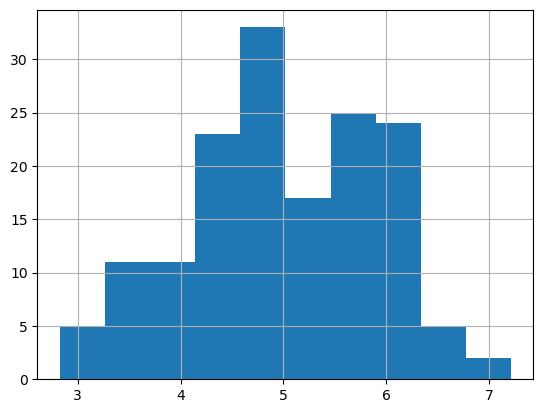

In [47]:
np.sqrt(df_new['WL']).hist()

<Axes: >

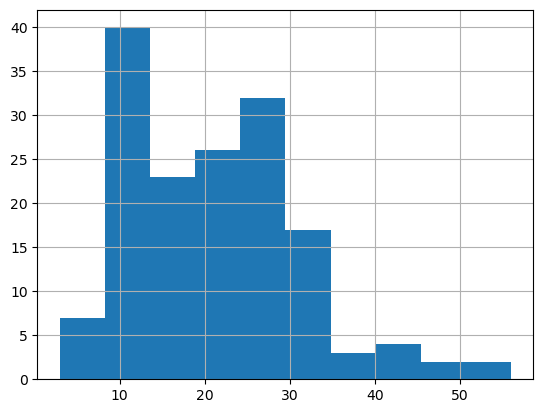

In [48]:
### Yoga

df_new['Yoga'].hist()

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Yoga', ylabel='Density'>

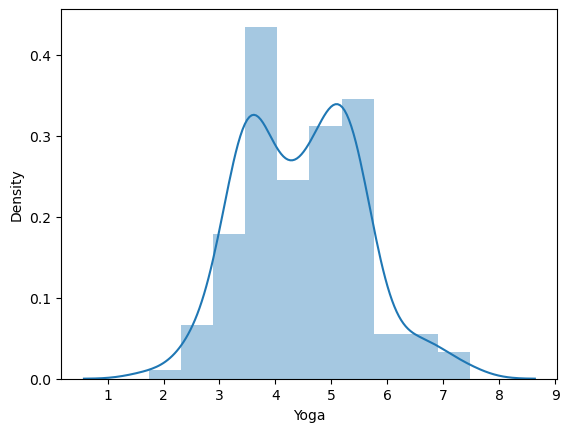

In [49]:
sns.distplot(np.sqrt(df_new['Yoga']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Laps', ylabel='Density'>

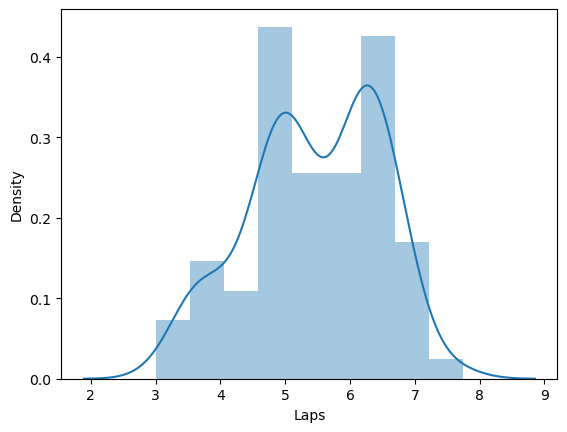

In [50]:
sns.distplot(np.sqrt(df_new['Laps']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WI', ylabel='Density'>

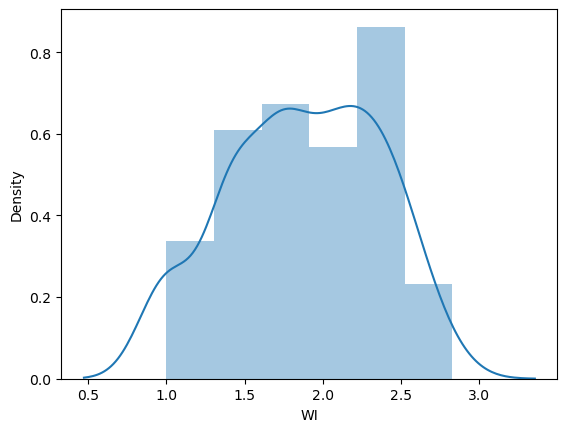

In [51]:
sns.distplot(np.sqrt(df_new['WI']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='PAFS', ylabel='Density'>

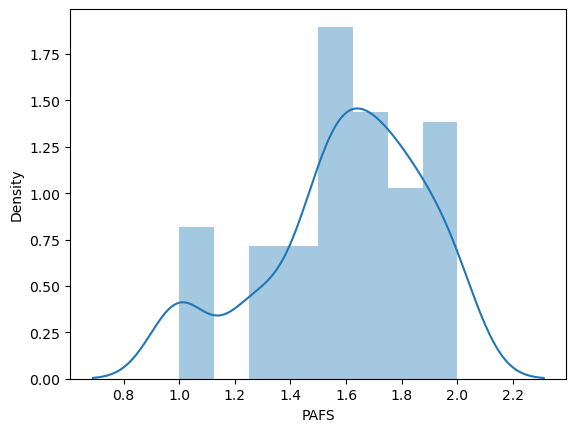

In [52]:
sns.distplot(np.cbrt(df_new['PAFS']))

In [53]:
## Bivariate Analysis

## 1 Linear Correlation --> Pearson correlation

df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [54]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [55]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [56]:
df_new["Points"] = df_clean["Points"]

In [57]:
df_new["Team"] = df_clean["Team"]

In [58]:
df_new.corr()

/tmp/ipykernel_741/4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.940899,0.989656,0.716546,0.001012,0.448556
Yoga,0.940899,1.000000,0.927862,0.617798,0.026512,0.343593
Laps,0.989656,0.927862,1.000000,0.776036,0.024935,0.479233
WI,0.716546,0.617798,0.776036,1.000000,0.129837,0.425148
PAFS,0.001012,0.026512,0.024935,0.129837,1.000000,0.048566
Points,0.448556,0.343593,0.479233,0.425148,0.048566,1.000000


/tmp/ipykernel_741/4116783392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True)


Text(0.5, 1.0, 'Linear Correlation Matrix')

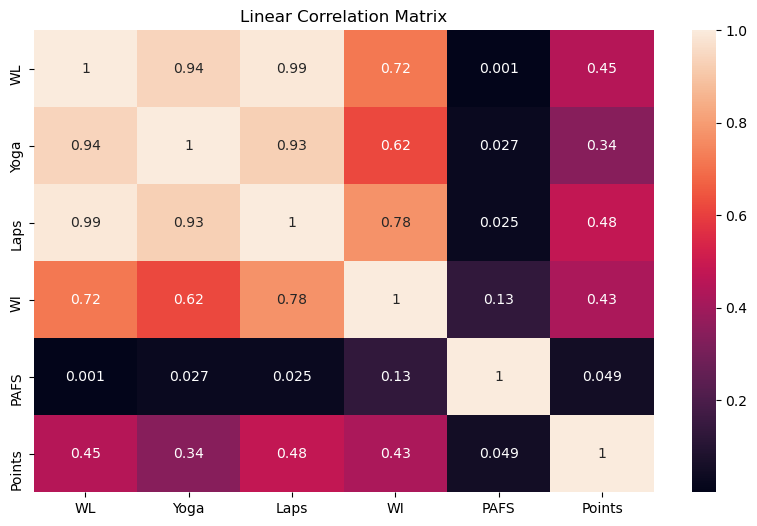

In [59]:
plt.rcParams["figure.figsize"]=(10,6)
sns.heatmap(df_new.corr(),annot=True)

plt.title("Linear Correlation Matrix")

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


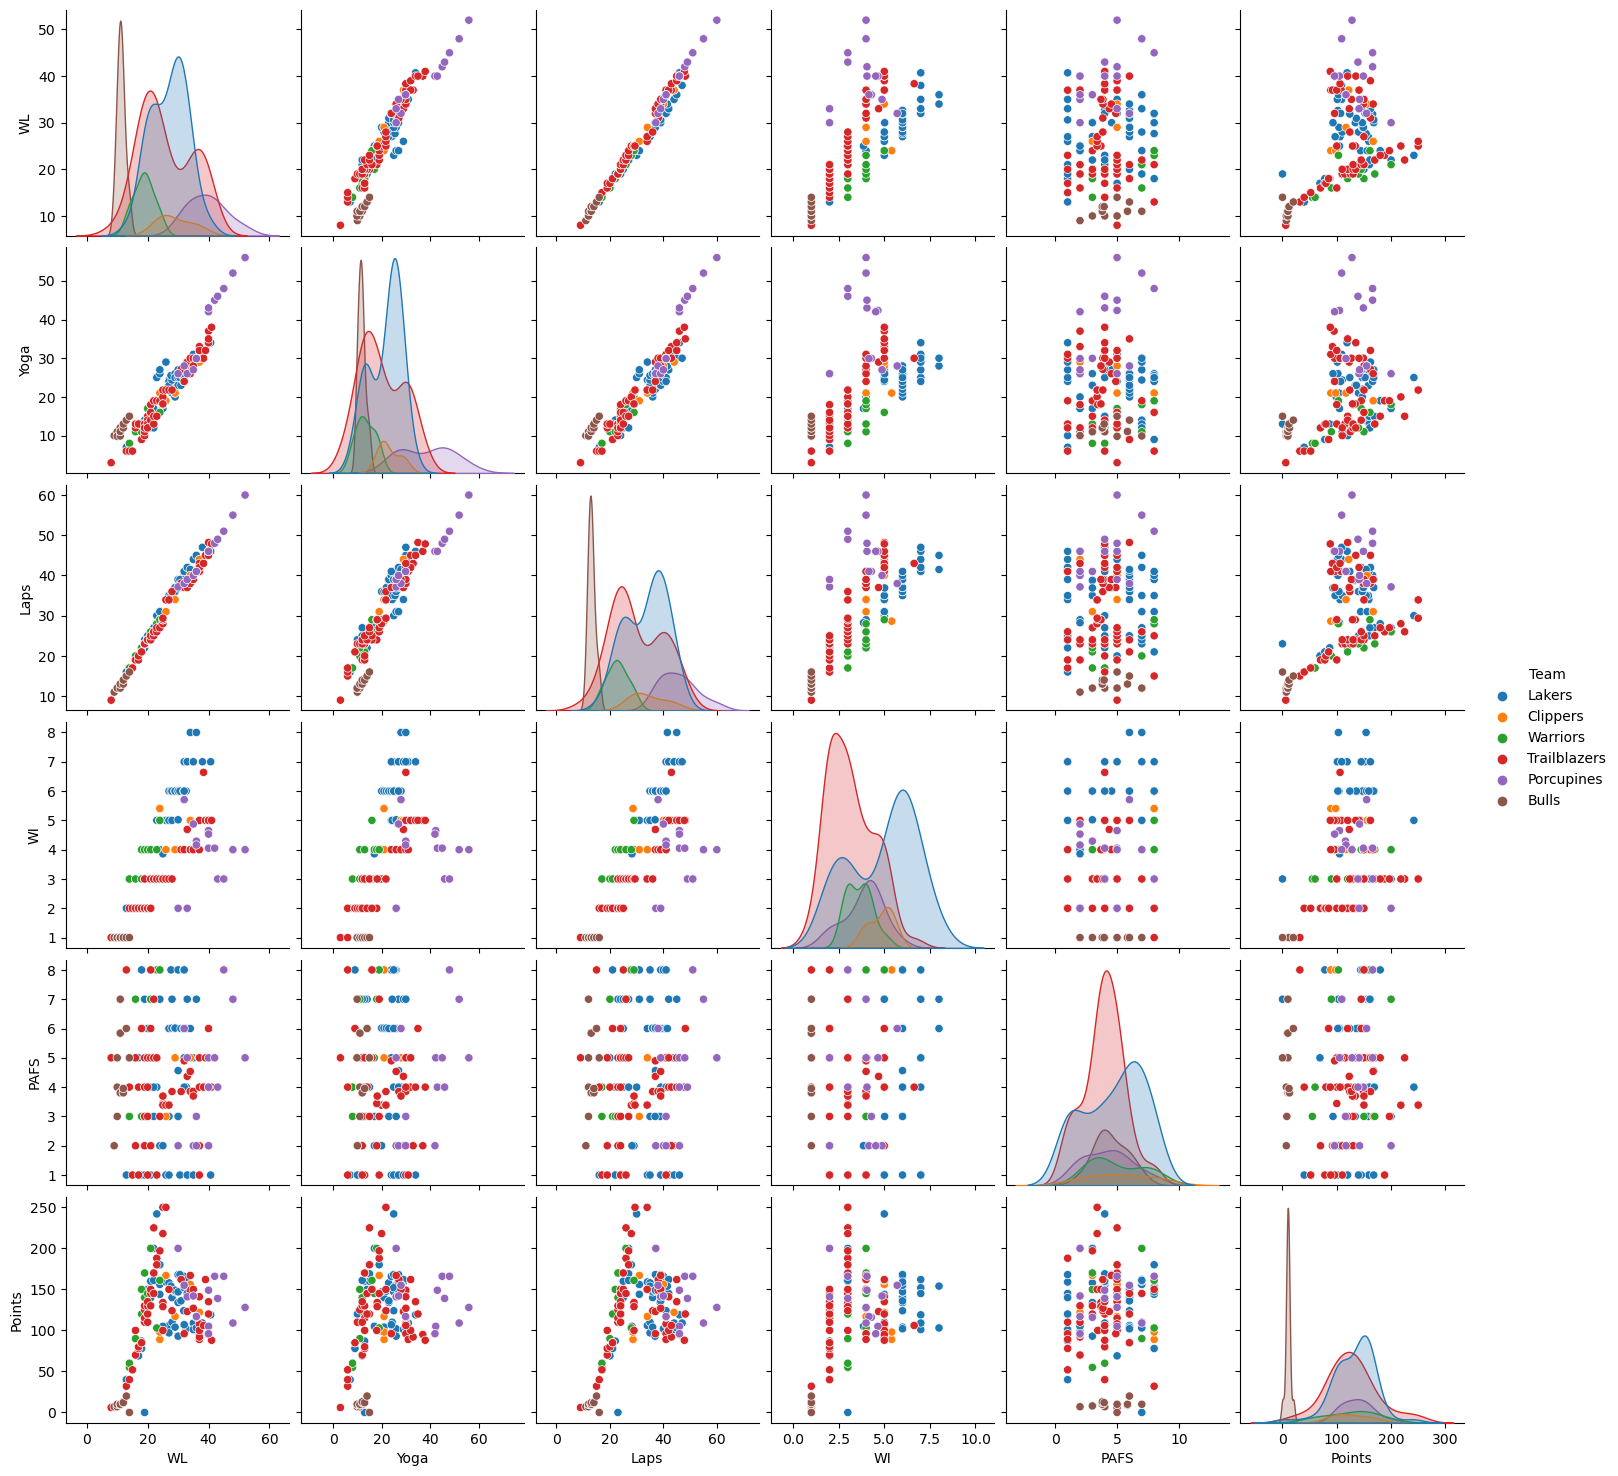

In [60]:
sns.pairplot(df_new,kind='scatter',hue='Team')

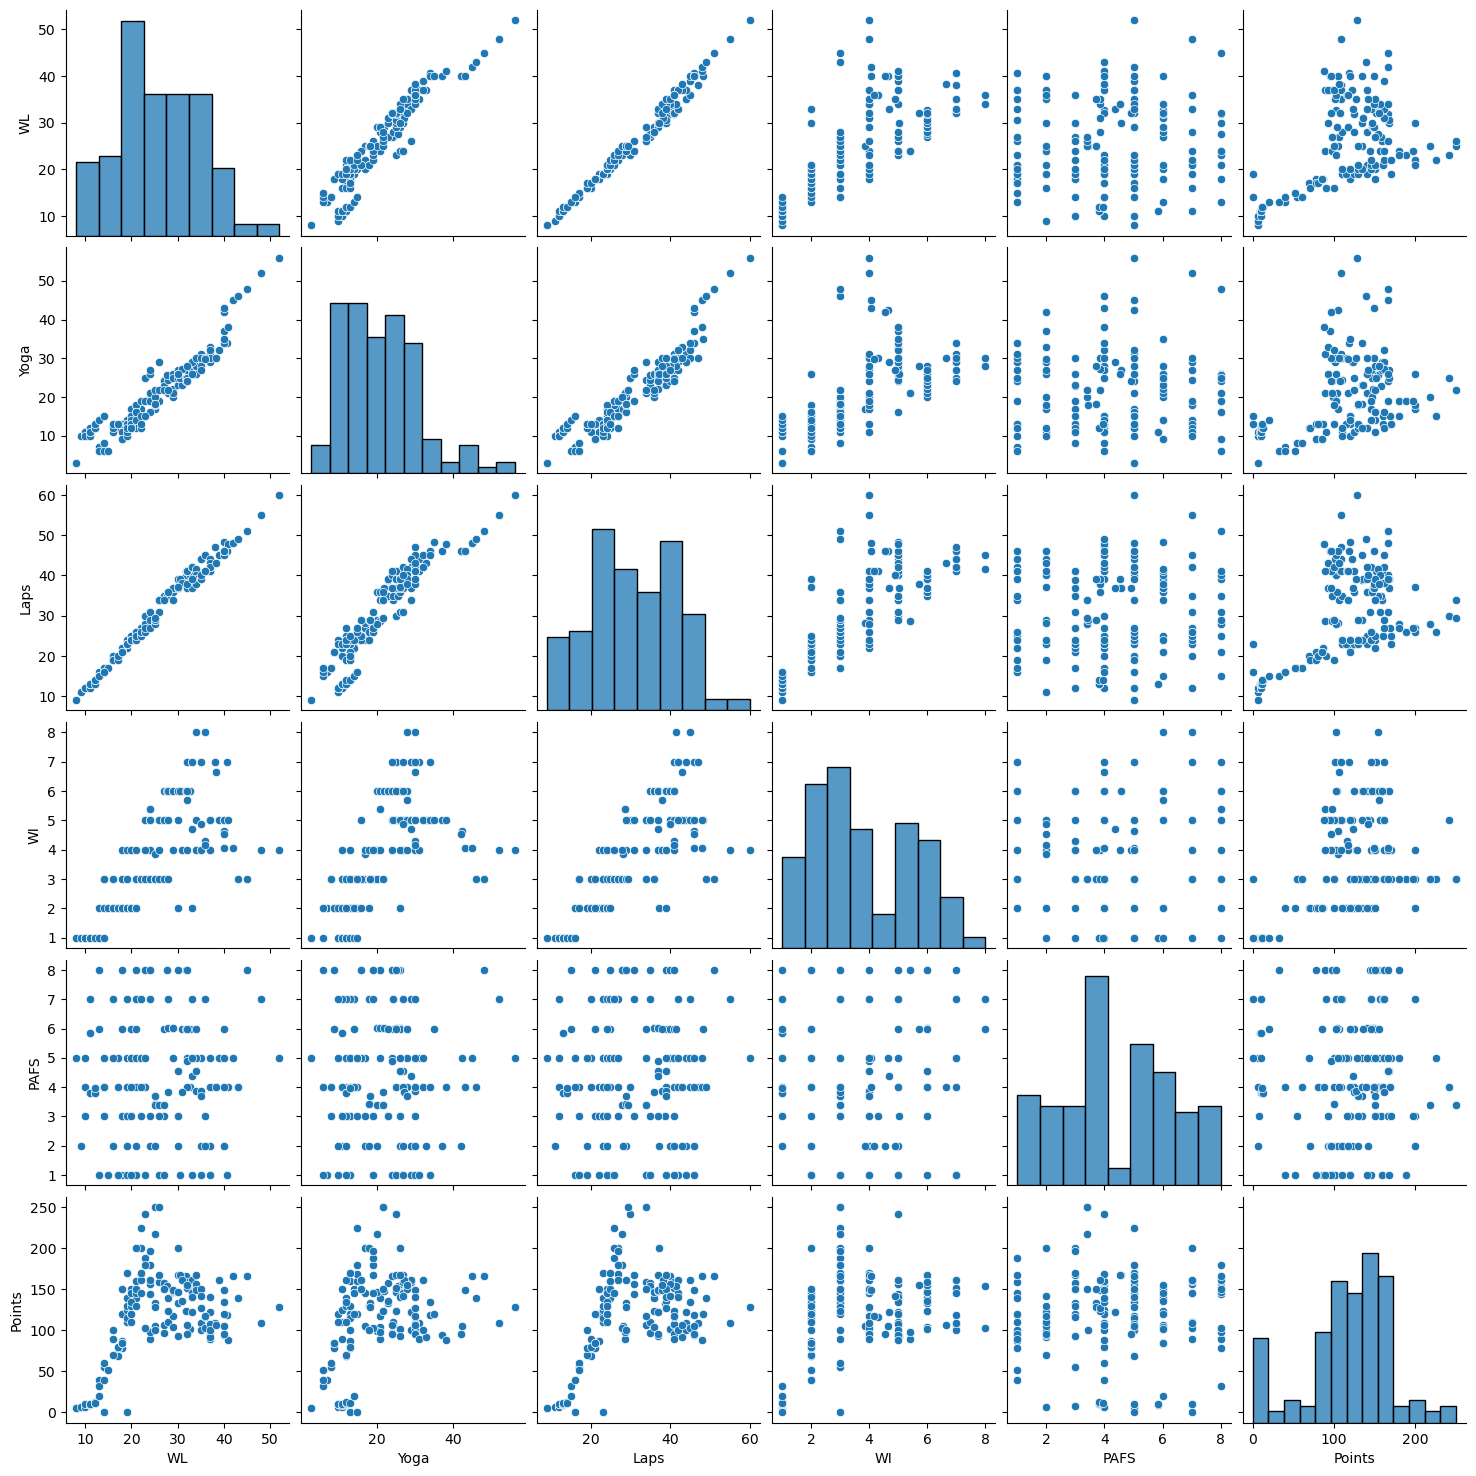

In [61]:
sns.pairplot(df_new,kind='scatter')

In [62]:
def chaterjee_corr(df,x,y):
    N=df.shape[0]
    df_rank=df
    
    df_rank['rank']=df_rank[y].rank()
    #print(df_rank['rank'])
    
    df_rank['rank_x']=df_rank[x].rank()
    
    df_rank=df_rank.sort_values(by='rank_x')
    
    #1-3*(abs(sum(xri-1 - Xir))/n square -1
    
    #Diff function --> summation -> absolute
    
    chatt_corr = 1-3 * df_rank['rank'].diff().abs().sum() / (pow(N,2)-1)
    
    return chatt_corr

In [63]:
chaterjee_corr(df_new,'WL','Points')

0.4062872405999589

In [64]:
chaterjee_corr(df_new,'WI','Points')

0.39198685021573865

In [65]:
chaterjee_corr(df_new,'Laps','Points')

0.4229299363057325

In [66]:
chaterjee_corr(df_new,'PAFS','Points')

0.0019930141771111742

In [67]:
chaterjee_corr(df_new,'Yoga','Points')

0.2911444421614958

## Single way Anova

In [68]:
import random

nba_id = list(df_new.index.unique())

random.seed(13)

sample_match_id = random.sample(nba_id,50)

sample_df = df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

In [69]:
sample_df

,WL,Yoga,Laps,WI,PAFS,Points,Team,rank,rank_x
0,26.000000,29.000000,34.000000,5.000000,1.000000,159,Lakers,126.5,126.0
1,28.000000,24.366748,35.000000,5.000000,7.000000,110,Lakers,62.5,98.0
2,29.000000,25.000000,37.000000,6.000000,6.014168,149,Lakers,110.0,101.5
3,30.000000,25.000000,39.000000,6.000000,8.000000,147,Lakers,106.0,101.5
4,32.712197,28.000000,39.000000,6.000000,4.000000,155,Lakers,121.5,121.0
5,30.604567,25.000000,39.000000,6.000000,1.000000,168,Lakers,140.5,101.5
6,36.000000,30.000000,45.000000,8.000000,7.000000,103,Lakers,49.5,134.5
7,40.701081,34.000000,46.000000,7.000000,1.000000,119,Lakers,69.0,144.5
8,13.000000,7.000000,16.000000,2.000000,1.000000,40,Lakers,18.5,5.0
9,18.000000,9.000000,21.000000,2.000000,8.000000,78,Lakers,25.5,9.0


In [70]:
sample_df=sample_df[['Team','Points']]

groups=sample_df.groupby('Team').count().reset_index()

In [71]:
groups

,Team,Points
0,Bulls,5
1,Clippers,4
2,Lakers,14
3,Porcupines,3
4,Trailblazers,20
5,Warriors,4


In [72]:
## Normality

import scipy.stats as stats

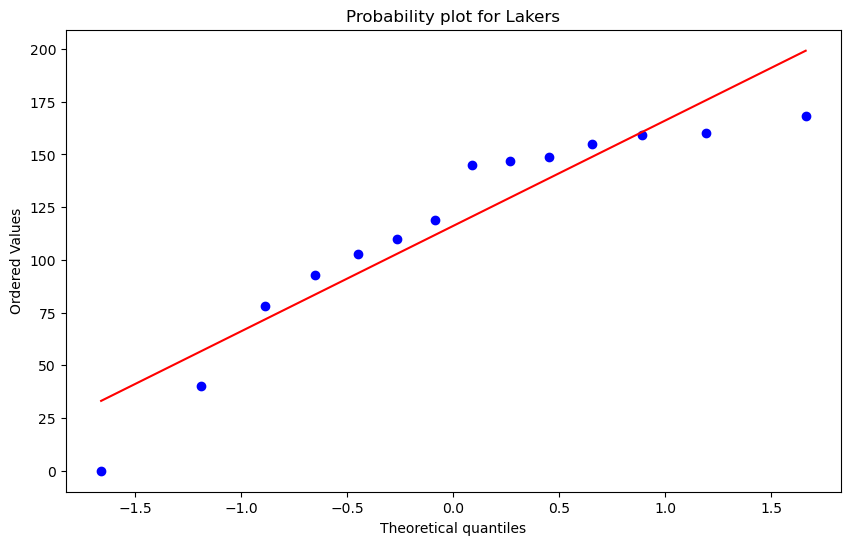

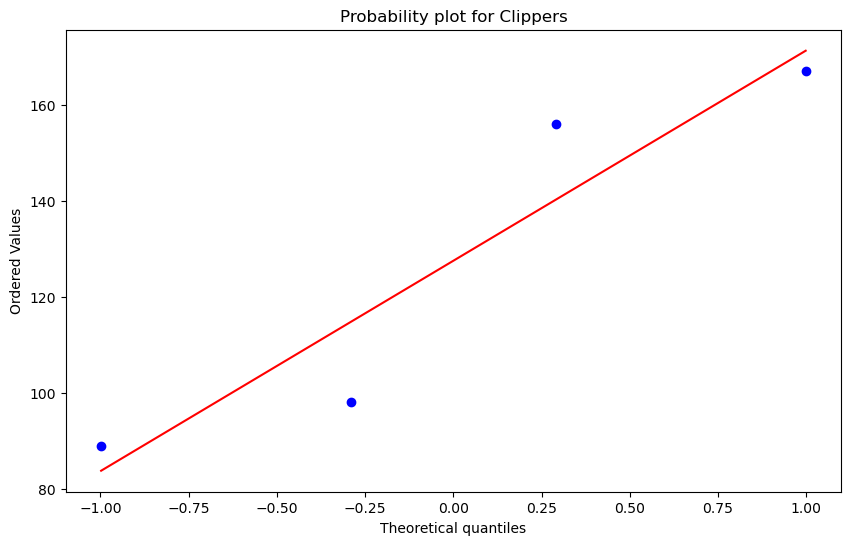

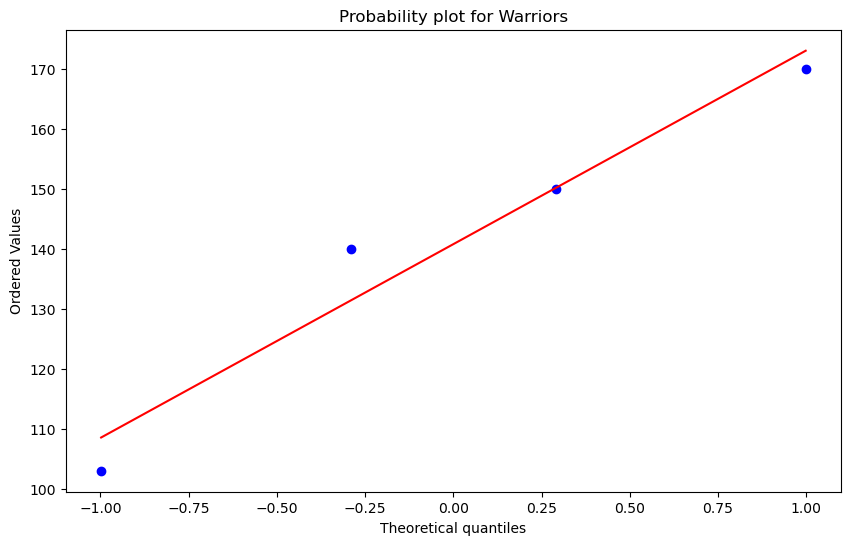

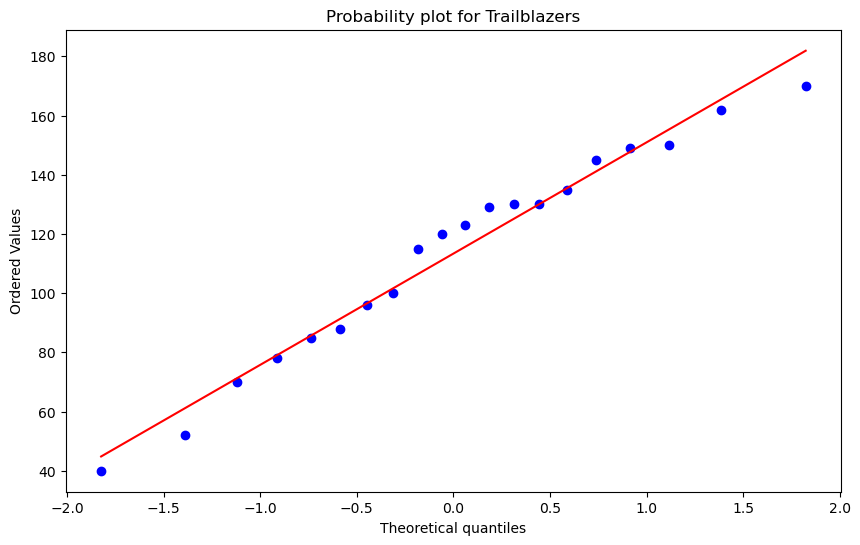

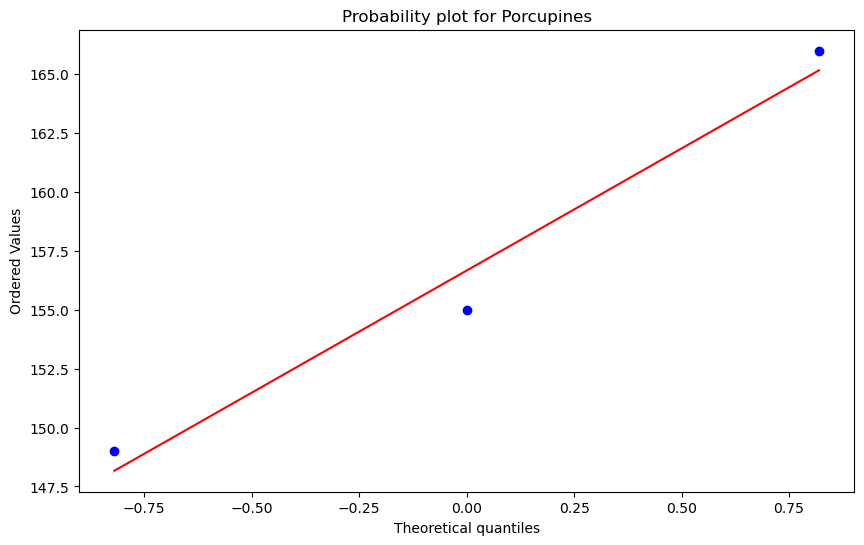

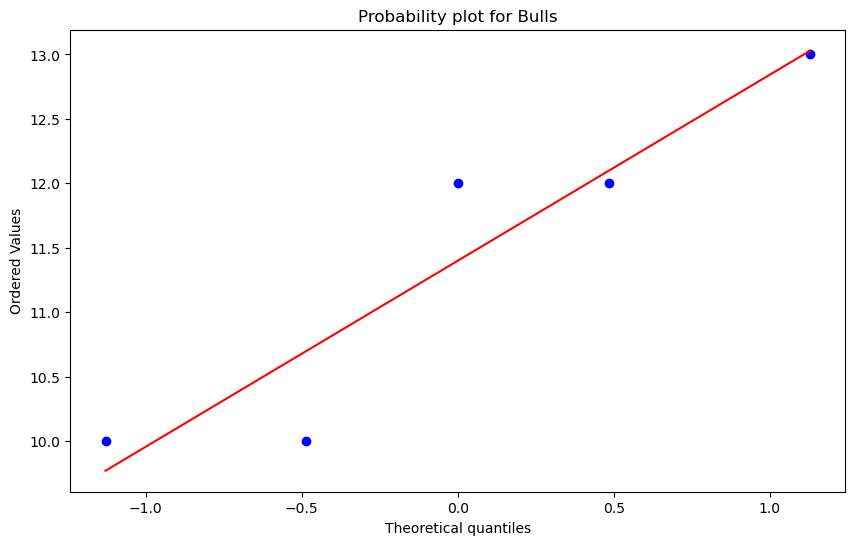

In [73]:
unique_teams=sample_df['Team'].unique()

for i in unique_teams:
    stats.probplot(sample_df[sample_df['Team']==i]['Points'],dist='norm',plot=plt)
    plt.title('Probability plot for '+i)
    plt.show()

In [74]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    37.164289
dtype: float64

In [75]:
# implement anova from scratch

data = [['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F Value','P Value','F critical'])

anova_table.set_index('Variation',inplace=True)

In [76]:
x_bar=sample_df['Points'].mean()

#porcupines -2 overall 10 8
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [77]:
anova_table['SS']['Between Groups']=SSTR['Points'].sum()

In [78]:
anova_table

,SS,df,MS,F Value,P Value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,,,,,,
Total,,,,,,


In [79]:
SSE=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [80]:
SSE

,Points
Team,
Bulls,7.200000
Clippers,4725.000000
Lakers,32319.714286
Porcupines,148.666667
Trailblazers,24798.550000
Warriors,2366.750000


In [81]:
anova_table['SS']['Within Groups']=SSE['Points'].sum()

In [82]:
anova_table

,SS,df,MS,F Value,P Value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,,,,,,


In [83]:
total=SSE['Points'].sum()+SSTR['Points'].sum()

In [84]:
anova_table['SS']['Total']=total

In [85]:
anova_table

,SS,df,MS,F Value,P Value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,125268.02,,,,,


In [86]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1

In [87]:
anova_table

,SS,df,MS,F Value,P Value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,,,,
Within Groups,64365.880952,44,,,,
Total,125268.02,49,,,,


In [88]:
anova_table['MS']=anova_table['SS']/anova_table['df']
anova_table['F Value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']

anova_table['P Value']['Between Groups']=1-stats.f.cdf(anova_table['F Value']['Between Groups'],
                                                       anova_table['df']['Between Groups'],
                                                       anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F Value,P Value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.326443,0.000013,
Within Groups,64365.880952,44,1462.860931,,,
Total,125268.02,49,2556.490204,,,


In [89]:
alpha=0.05

hypothesis_type="two tailed"

if hypothesis_type=="two tailed":
    alpha=alpha/2
    

anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha,
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F Value,P Value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.326443,0.000013,2.871184
Within Groups,64365.880952,44,1462.860931,,,
Total,125268.02,49,2556.490204,,,


In [90]:
# Pvalue Approach

print("Approach for P value")

conclusion="Failed to reject null hypothesis"

if anova_table['P Value']['Between Groups']<=alpha:
    conclusion="Null hypothesis is rejected"
    
print("F value for the table is ", anova_table['F Value']['Between Groups'],"and p value is ",anova_table['P Value']['Between Groups'])

print(conclusion)

Approach for P value
F value for the table is  8.326442762673361 and p value is  1.3292810565279645e-05
Null hypothesis is rejected


In [91]:
# F critical Approach

print("Approach for F critical")

conclusion="Failed to reject null hypothesis"

if anova_table['F Value']['Between Groups']>anova_table['F critical']['Between Groups']:
    conclusion="Null hypothesis is rejected"
    
print("F value for the table is ", anova_table['F Value']['Between Groups'],"and F critical is ",anova_table['F critical']['Between Groups'])

print(conclusion)

Approach for F critical
F value for the table is  8.326442762673361 and F critical is  2.871183837102218
Null hypothesis is rejected


In [92]:
## Processing Data for modeling

one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [93]:
one_hot_df.head()

,Points,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,242,23.0,25.0,30.0,5.0,4.0,0,1,0,0,0
1,144,24.0,26.0,31.0,5.0,8.0,0,1,0,0,0
2,156,24.0,27.0,31.0,5.0,7.0,0,1,0,0,0
3,159,26.0,29.0,34.0,5.0,1.0,0,1,0,0,0
4,106,27.0,NaN,34.0,5.0,6.0,0,1,0,0,0


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [95]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [96]:
# Start imputing here

imputer=LGBMImputer(n_iter=15,verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,23.0,25.0,30.0,5.000000,4.000000,0,1,0,0,0
47,21.0,15.0,25.0,3.000000,4.000000,0,1,0,0,0
111,33.0,29.0,37.0,4.132778,4.127003,0,0,0,1,0
95,22.0,13.0,25.0,3.000000,5.000000,0,0,0,1,0
59,34.0,28.0,40.0,5.000000,5.000000,1,0,0,0,0


## Modeling Starts here

In [97]:
# requires less time 

result=sm.OLS(y_train,X_train_clean).fit()

In [98]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              169.4
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                    1.57e-63
Time:                        08:15:44   Log-Likelihood:                         -607.04
No. Observations:                 124   AIC:                                      1234.
Df Residuals:                     114   BIC:                                      1262.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [99]:
X_const=sm.add_constant(X_train_clean)

result=sm.OLS(y_train,X_const).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     16.22
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           9.14e-18
Time:                        08:15:46   Log-Likelihood:                -607.04
No. Observations:                 124   AIC:                             1236.
Df Residuals:                     113   BIC:                             1267.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7182     13.92

In [100]:
X_test

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
35,13.0,7.0,16.0,2.0,1.0,0,1,0,0,0
53,25.0,17.0,NaN,NaN,2.0,0,1,0,0,0
84,19.0,11.0,23.0,2.0,4.0,0,0,0,1,0
40,19.0,13.0,23.0,3.0,7.0,0,1,0,0,0
71,24.0,16.0,29.0,5.0,8.0,0,0,0,0,1
5,27.0,NaN,35.0,5.0,1.0,0,1,0,0,0
48,22.0,15.0,27.0,3.0,4.0,0,1,0,0,0
1,24.0,26.0,31.0,5.0,8.0,0,1,0,0,0
67,19.0,13.0,23.0,4.0,3.0,0,0,0,0,1
133,36.0,NaN,41.0,NaN,2.0,0,0,1,0,0


In [101]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [102]:
res=result.predict(sm.add_constant(test[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [103]:
# RMSE, MAE, MSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [104]:
# from numpy.lib.function_base import median

print("MAE of the model is",mean_absolute_error(y_test,res))

MAE of the model is 45.172698776175594


In [105]:
print("MSE of the model is",mean_squared_error(y_test,res))

MSE of the model is 3267.781845341119


In [106]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,res)))

RMSE of the model is 57.164515613631494


In [107]:
len(X_train_clean)

124

In [108]:
from sklearn import metrics
print("R2 score for test is ",metrics.r2_score(y_test,res))

R2 score for test is  0.08854418048061563


In [109]:
# Line is not fir for regression so we are going for polynomials
# We will create a line as well as polynomial

#numpy.polyfit
# numpy.linespace -> create space and plot values -> Space creation using args
# numpy.poly1d -> To create polynomial regression



In [110]:
def create_polynomial_plot(feature,label):
    #convert to 1d
    x_coordinates=feature
    y_coordinates=np.squeeze(label)
    
    linear_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,1))
    quadratic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,2))
    cubic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,3))
    
    values=np.linspace(x_coordinates.min(),x_coordinates.max(),len(x_coordinates))
    plt.scatter(x_coordinates,y_coordinates,color='blue')
    plt.plot(values,linear_poly(values),color='cyan',label='Linear Model')
    plt.plot(values,quadratic_poly(values),color='red',label='Quadratic Model')
    plt.plot(values,cubic_poly(values),color='yellow',label='Cubic Model')
    
    plt.xlabel("%s from data" %(feature.name))
    plt.ylabel("Points")
    
    plt.rcParams["figure.figsize"]=(12,6)
    
    plt.legend()
    plt.title("Linear vs Quadratic")
    
    plt.show()
    
    

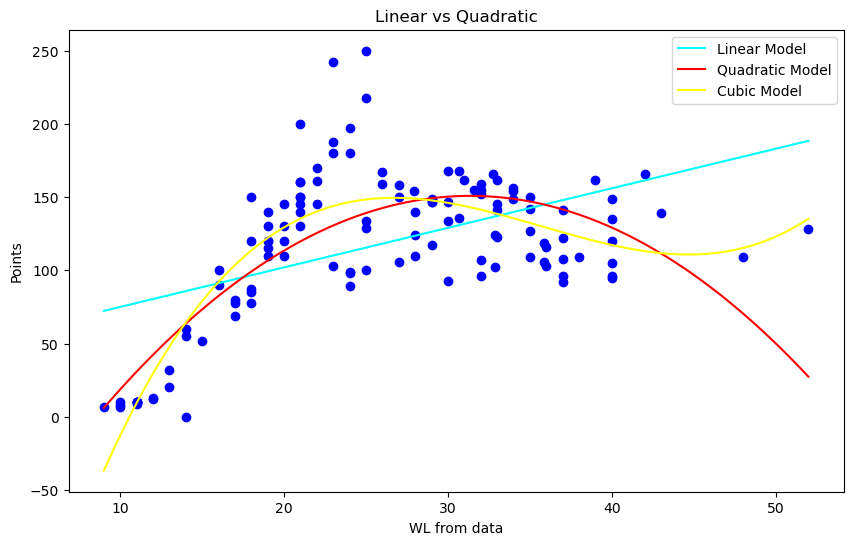

In [111]:
create_polynomial_plot(X_train_clean.WL,y_train)

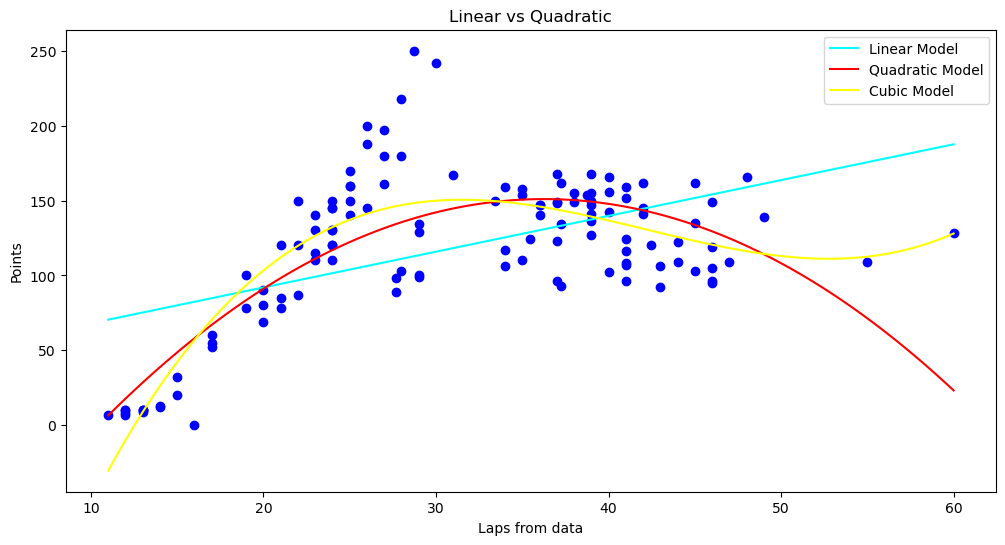

In [112]:
create_polynomial_plot(X_train_clean.Laps,y_train)

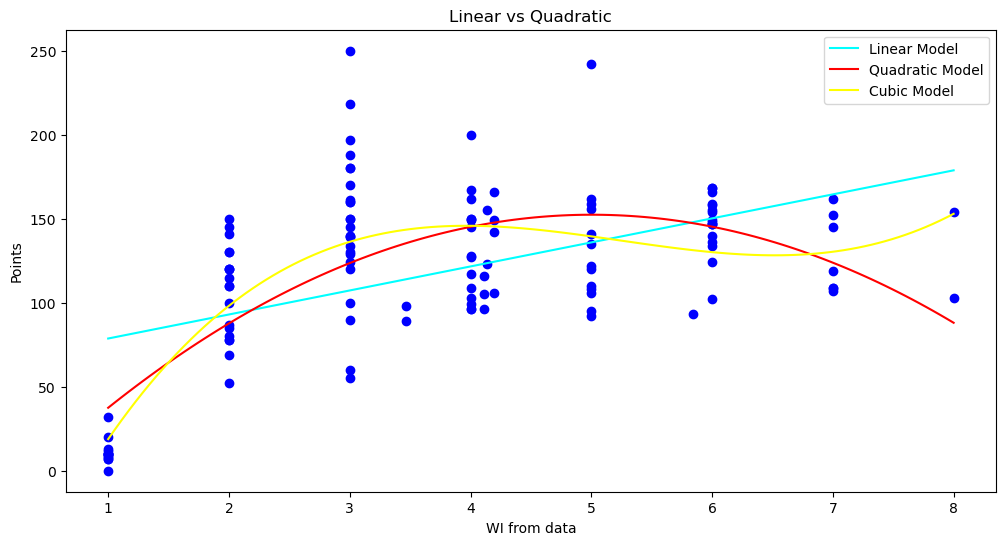

In [113]:
create_polynomial_plot(X_train_clean.WI,y_train)

In [114]:
##########
# 1. Create a set of polynomial features

# 2. Apply a linear Regression
##########

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures()

In [117]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train)

LinearRegression()

In [118]:
# Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",metrics.r2_score(y_test,predictions))

R2 score for test is -3.5286829906832304


In [119]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE of the model is 127.42207622360161


# Regression Splines 

Piecewise Regression(Segmented Regression)

In [120]:
import piecewise_regression

In [121]:
# 2 dimensions
# 1 dependent and 1 independent
# X_train_clean (no missing values) --> NA --->

In [122]:
X_train_clean.WL, y_train

(0      23.0
 47     21.0
 111    33.0
 95     22.0
 59     34.0
        ... 
 146    10.0
 104    25.0
 75     15.0
 70     23.0
 116    37.0
 Name: WL, Length: 124, dtype: float64,
 0      242
 47     160
 111    123
 95     170
 59     156
       ... 
 146      8
 104    129
 75      52
 70     103
 116     96
 Name: Points, Length: 124, dtype: int64)

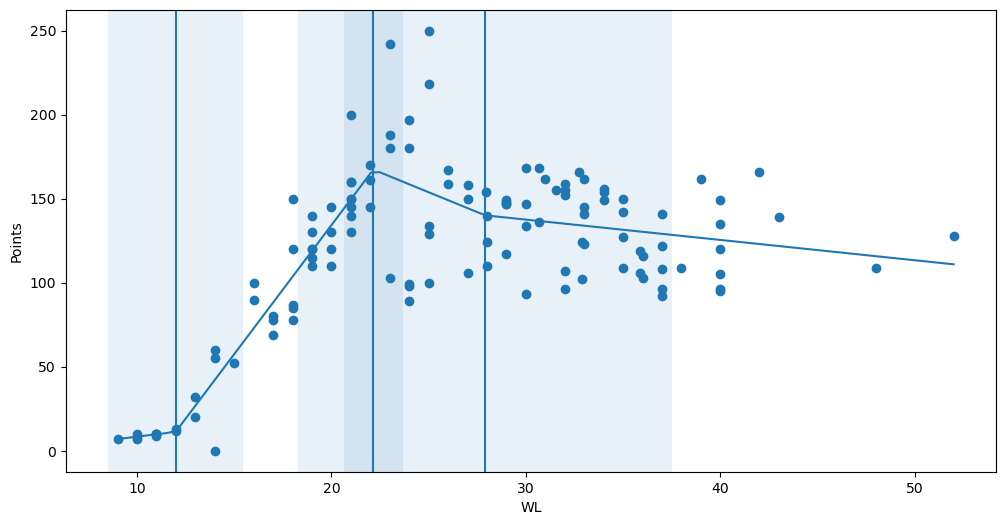

In [123]:
pw_fit=piecewise_regression.Fit(X_train_clean.WL.ravel(),y_train.ravel(),n_breakpoints=3)
pw_fit.plot()
plt.xlabel('WL')
plt.ylabel('Points')
plt.show()

In [124]:
print(pw_fit.summary())


                    Breakpoint Regression Results                     
No. Observations                      124
No. Model Parameters                    8
Degrees of Freedom                    116
Res. Sum of Squares               84978.3
Total Sum of Squares          3.16035e+05
R Squared                        0.731111
Adjusted R Squared               0.712406
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -5.84211     1.38e+02    -0.042374         0.966      -278.91       267.23
alpha1               1.42105         13.2      0.10788         0.914      -24.668        27.51
beta1                13.9388         13.3       1.0515             -      -12.316       40.194
beta2               -20.0943         4.89      -4.1051             -      -29.789      -10.399
beta3            

In [125]:
# non zero difference  in slopes (slope params) when there are segments

# beta --> 0 that means there is no breakpoint,

In [126]:
overall_model=piecewise_regression.ModelSelection(X_train_clean.WL.ravel(),y_train.ravel(),max_breakpoints=5)

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 


Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 
Running fit with n_breakpoint = 4 . . 
Running fit with n_breakpoint = 5 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                     948.09         True      2.4e+05 
1                      833.7         True   8.8272e+04 
2                     840.13         True   8.6018e+04 
3                     848.26         True   8.4976e+04 
4                                   False              
5                                   False              

Min BIC (Bayesian Information Criterion) suggests best model


Plotting fit for the model with 1 breakpoints


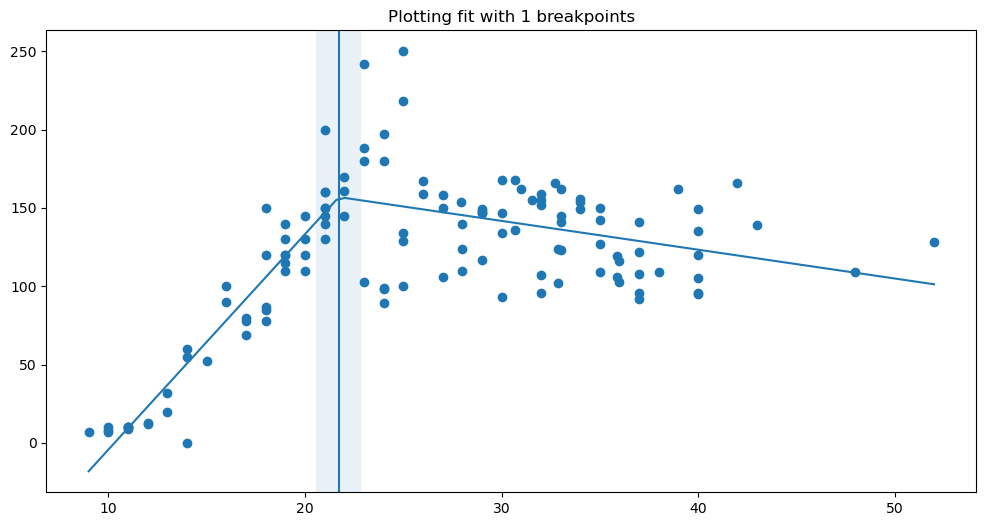

Plotting fit for the model with 2 breakpoints


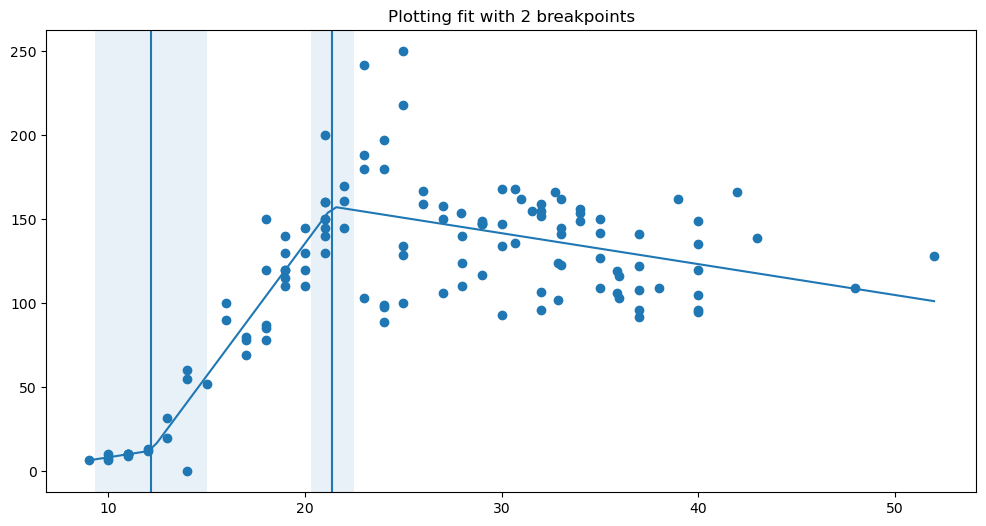

Plotting fit for the model with 3 breakpoints


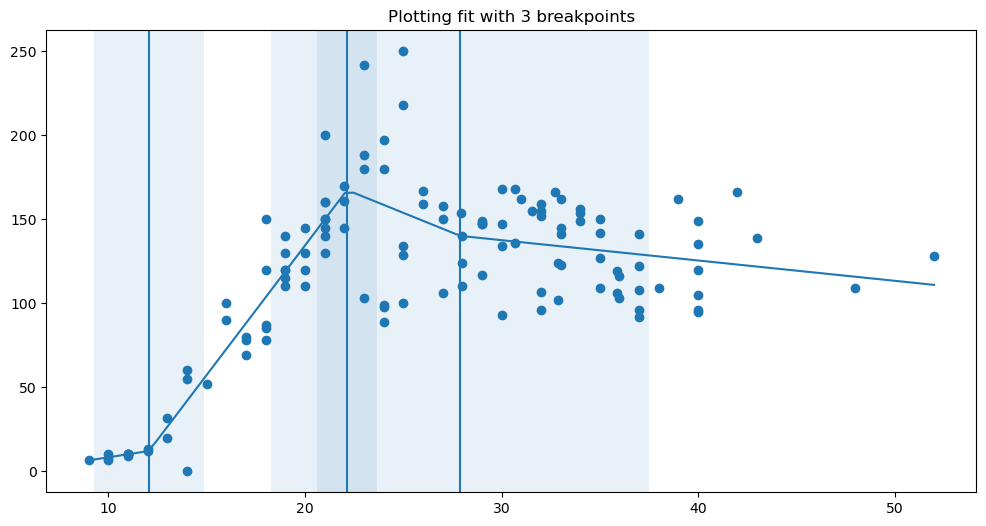

Plotting fit for the model with 4 breakpoints
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No breakpoints to plot
Algorithm didn't converge. No breakpoint estimates to plot


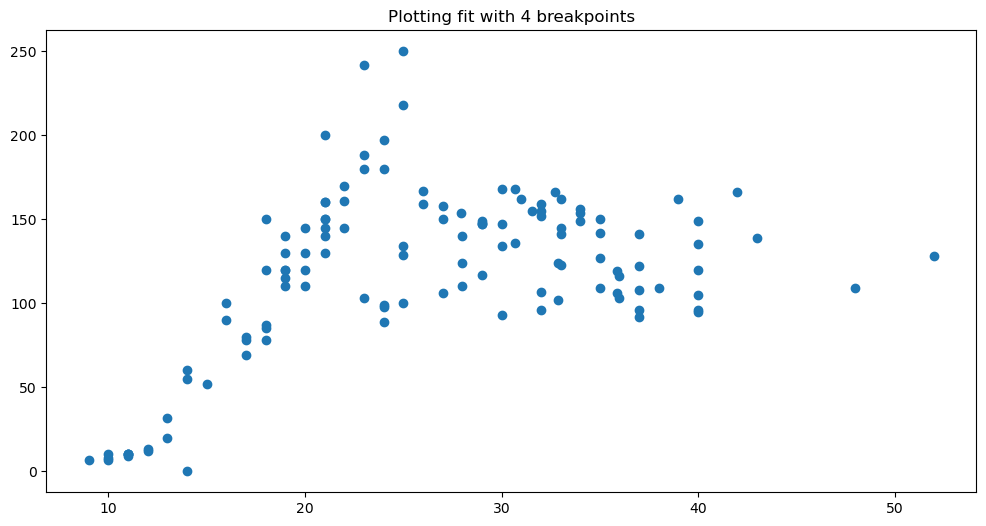

Plotting fit for the model with 5 breakpoints
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No breakpoints to plot
Algorithm didn't converge. No breakpoint estimates to plot


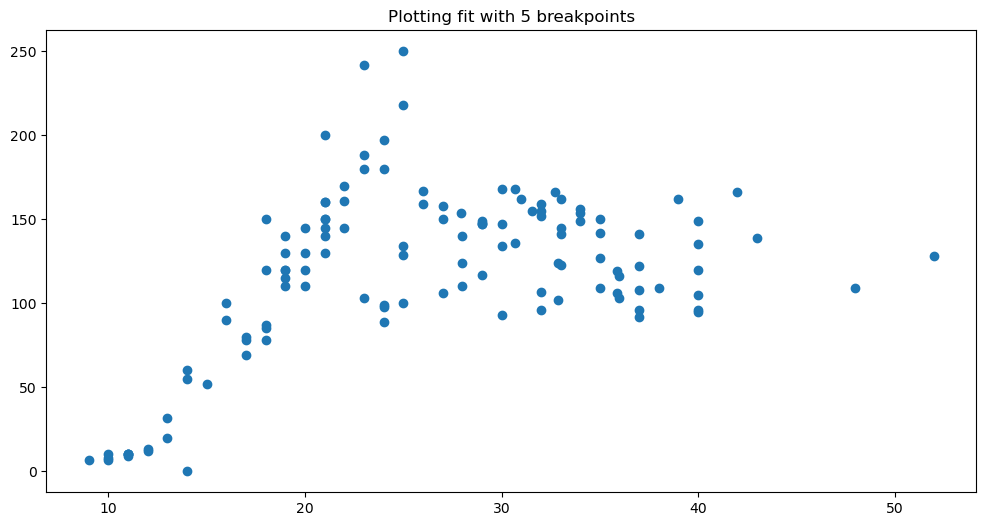

In [127]:
for model in overall_model.models:
    print("Plotting fit for the model with {} breakpoints".format(model.n_breakpoints))
    model.plot()
    plt.title("Plotting fit with {} breakpoints".format(model.n_breakpoints))
    plt.show()

In [128]:
# 2 way ---> Sklearn tree regressor -> Bin --> 2
# piecewise

In [129]:
#!git clone https://github.com/DataDog/piecewise.git

fatal: destination path 'piecewise' already exists and is not an empty directory.


In [130]:
from piecewise.piecewise.regressor import piecewise

In [131]:
model_piecewise=piecewise(X_train_clean.WL.ravel(),y_train.ravel())

In [132]:
model_piecewise

FittedModel with segments:
* FittedSegment(start_t=9.0, end_t=24.0, coeffs=(-142.8389453354606, 13.818372659333278))
* FittedSegment(start_t=24.0, end_t=52.0, coeffs=(182.37083461206157, -1.435769327200797))

In [133]:
pw_fit.get_results()

{'estimates': {'const': {'estimate': -5.842105263159564,
   'se': 137.870573005327,
   'confidence_interval': (-278.91214712659803, 267.2279366002789),
   't_stat': -0.04237383754787063,
   'p_t': 0.9662735351772359},
  'beta1': {'estimate': 13.938845137937598,
   'se': 13.255806192837856,
   'confidence_interval': (-12.315949290689318, 40.193639566564514),
   't_stat': 1.051527529534099,
   'p_t': '-'},
  'breakpoint1': {'estimate': 11.984522116546769,
   'se': 1.7513265743624675,
   'confidence_interval': (8.515799164628426, 15.453245068465112),
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': -20.094272769516714,
   'se': 4.894987172823698,
   'confidence_interval': (-29.789411645542966, -10.399133893490461),
   't_stat': -4.10507158855847,
   'p_t': '-'},
  'breakpoint2': {'estimate': 22.151150141304587,
   'se': 0.7679045940623968,
   'confidence_interval': (20.630218334923807, 23.672081947685367),
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate': 3.52475778252184

In [134]:
len(model_piecewise.segments)

2

In [135]:
y_pred=model_piecewise.predict(test.WL.ravel())

In [136]:
y_pred

array([ 36.79989924, 146.47660143, 119.71013519, 119.71013519,
       147.91237076, 143.60506278, 161.16525317, 147.91237076,
       119.71013519, 130.68313883,  78.25501721, 129.24736951,
       133.55467749, 139.2977548 , 105.89176253,  22.98152658,
       132.11890816, 123.5042922 , 133.52850785, 130.89865523,
       147.91237076, 133.52850785, 147.34688051, 140.73352412,
       145.0408321 , 133.52850785, -32.29196406, 161.16525317,
       119.71013519, 161.16525317, 117.76121489,  50.6182719 ])

In [138]:
from sklearn.metrics import r2_score,mean_squared_error

print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.529578629196394
41.06787564439923
